# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
#Since the 'unnamed' column is the same with the index, let's drop it.
train = pd.read_csv('df_train.csv') 

#This loads the test data set
test = pd.read_csv("df_test.csv")

In [4]:
#To be sure it is properly loaded, let's checkout the overview of the data for trains.
train

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


Observe that the `trains` dataset has `8763 rows × 49 columns`

In [5]:
#Let's also check for test.
test

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


Observe that the `test` data has `2920 rows × 48 columns`

In [6]:
#To save time, let's merge the two datasets.
merged_data = pd.concat([train, test]) 

#To be sure it is properly merged, let's view the first 5 rows of the merged dataset.
merged_data.head() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [7]:
#Since the 'unnamed' column is the same with the index, let's drop it.
final_data = merged_data.drop(['Unnamed: 0'], axis = 1)

#Check the first rows of the final data
final_data.head() 

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [8]:
#Let's view the number of rows and columns in the final_data
final_data.shape

(11683, 48)

In [9]:
#Observe that the last column (which is for testing) in the dataset has null values.
final_data.tail()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


Observe that the tail of the `load_shortfall_3h` column has null values. This is because of the merged test data. And these null values are what we want to predict in this model.

## Observing Different Data Types

In [10]:
#Let's run a check on the datatypes of the final_data
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Madrid_wind_speed     11683 non-null  float64
 2   Valencia_wind_deg     11683 non-null  object 
 3   Bilbao_rain_1h        11683 non-null  float64
 4   Valencia_wind_speed   11683 non-null  float64
 5   Seville_humidity      11683 non-null  float64
 6   Madrid_humidity       11683 non-null  float64
 7   Bilbao_clouds_all     11683 non-null  float64
 8   Bilbao_wind_speed     11683 non-null  float64
 9   Seville_clouds_all    11683 non-null  float64
 10  Bilbao_wind_deg       11683 non-null  float64
 11  Barcelona_wind_speed  11683 non-null  float64
 12  Barcelona_wind_deg    11683 non-null  float64
 13  Madrid_clouds_all     11683 non-null  float64
 14  Seville_wind_speed    11683 non-null  float64
 15  Barcelona_rain_1h   

Observe the datatype of the `time`, `Valencia_wind_deg`, and `Seville_pressure` columns are `object`. These will be dealt with later.

## Checking for Null Values

In [11]:
final_data.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

Observe that the `Valencia_pressure` and `load_shortfall_3h` columns have thousands of null values.

For that of `load_shortfall_3h`, the total 2920 null values correspond to the number of rows in the test data. So, this is appropriate.

However, for that of `Valencia_pressure`, we need to 'deal' with it.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


# I. Univariate Analysis: Non-Graphical

Let's take a look at the statistical details of our data:

In [12]:
final_data.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,...,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,...,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,...,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,...,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,...,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,...,296.483333,295.150000,289.816667,291.040000,293.483333,292.483333,296.641333,294.993167,293.708917,14498.166667
max,13.333333,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,360.000000,12.666667,...,314.483333,308.150000,309.816667,310.710000,306.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [13]:
print('Descriptive Statistics Of Madrid_wind_speed:',final_data.Madrid_wind_speed.describe())
print()
print('Descriptive Statistics Of Bilbao_rain_1h:' ,final_data.Bilbao_rain_1h.describe())
print()
print('Descriptive Statistics Of Valencia_wind_speed:',final_data.Valencia_wind_speed.describe())
print()


Descriptive Statistics Of Madrid_wind_speed: count    11683.000000
mean         2.433750
std          1.831762
min          0.000000
25%          1.000000
50%          2.000000
75%          3.333333
max         13.333333
Name: Madrid_wind_speed, dtype: float64

Descriptive Statistics Of Bilbao_rain_1h: count    11683.000000
mean         0.118698
std          0.334918
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max          3.000000
Name: Bilbao_rain_1h, dtype: float64

Descriptive Statistics Of Valencia_wind_speed: count    11683.000000
mean         2.692873
std          2.321759
min          0.000000
25%          1.000000
50%          2.000000
75%          3.666667
max         52.000000
Name: Valencia_wind_speed, dtype: float64



In [14]:
print('Skew Analysis For Each Feature In The Dataframe')
final_data.skew()

Skew Analysis For Each Feature In The Dataframe


Madrid_wind_speed        1.452792
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressure         -0.977531
Seville_weather_id      -3.230498
Valencia_pressure       -1.800572
Seville_temp_max         0.122162
Madrid_pressure         -2.140249
Valencia_temp_max        0.068277
Valencia_temp 

In [15]:
'''
Fairly Symetrical: '22 Features'
Highly Negatively Skewed: '7 Features'
Highly Positively Skewed: '16 Features'
Moderate Negatively Skewed: '1 Feature(s)'
Moderate Positively Skewed: '0 Features'

'''

"\nFairly Symetrical: '22 Features'\nHighly Negatively Skewed: '7 Features'\nHighly Positively Skewed: '16 Features'\nModerate Negatively Skewed: '1 Feature(s)'\nModerate Positively Skewed: '0 Features'\n\n"


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>

In [16]:
print('Kurtosis Analysis For Each Feature In The Dataframe')
final_data.kurtosis()

Kurtosis Analysis For Each Feature In The Dataframe


Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          2.939921
Seville_temp_max          -0.596016
Madrid_pressure            3

# II. Univariate Analysis:  Graphical

### a. Histogram and Density Plot
For the Histogram and Density Plot, we will use matplotlib  and plot for all the numerical features. We can visualise all numerical features simultaneously as shown below.

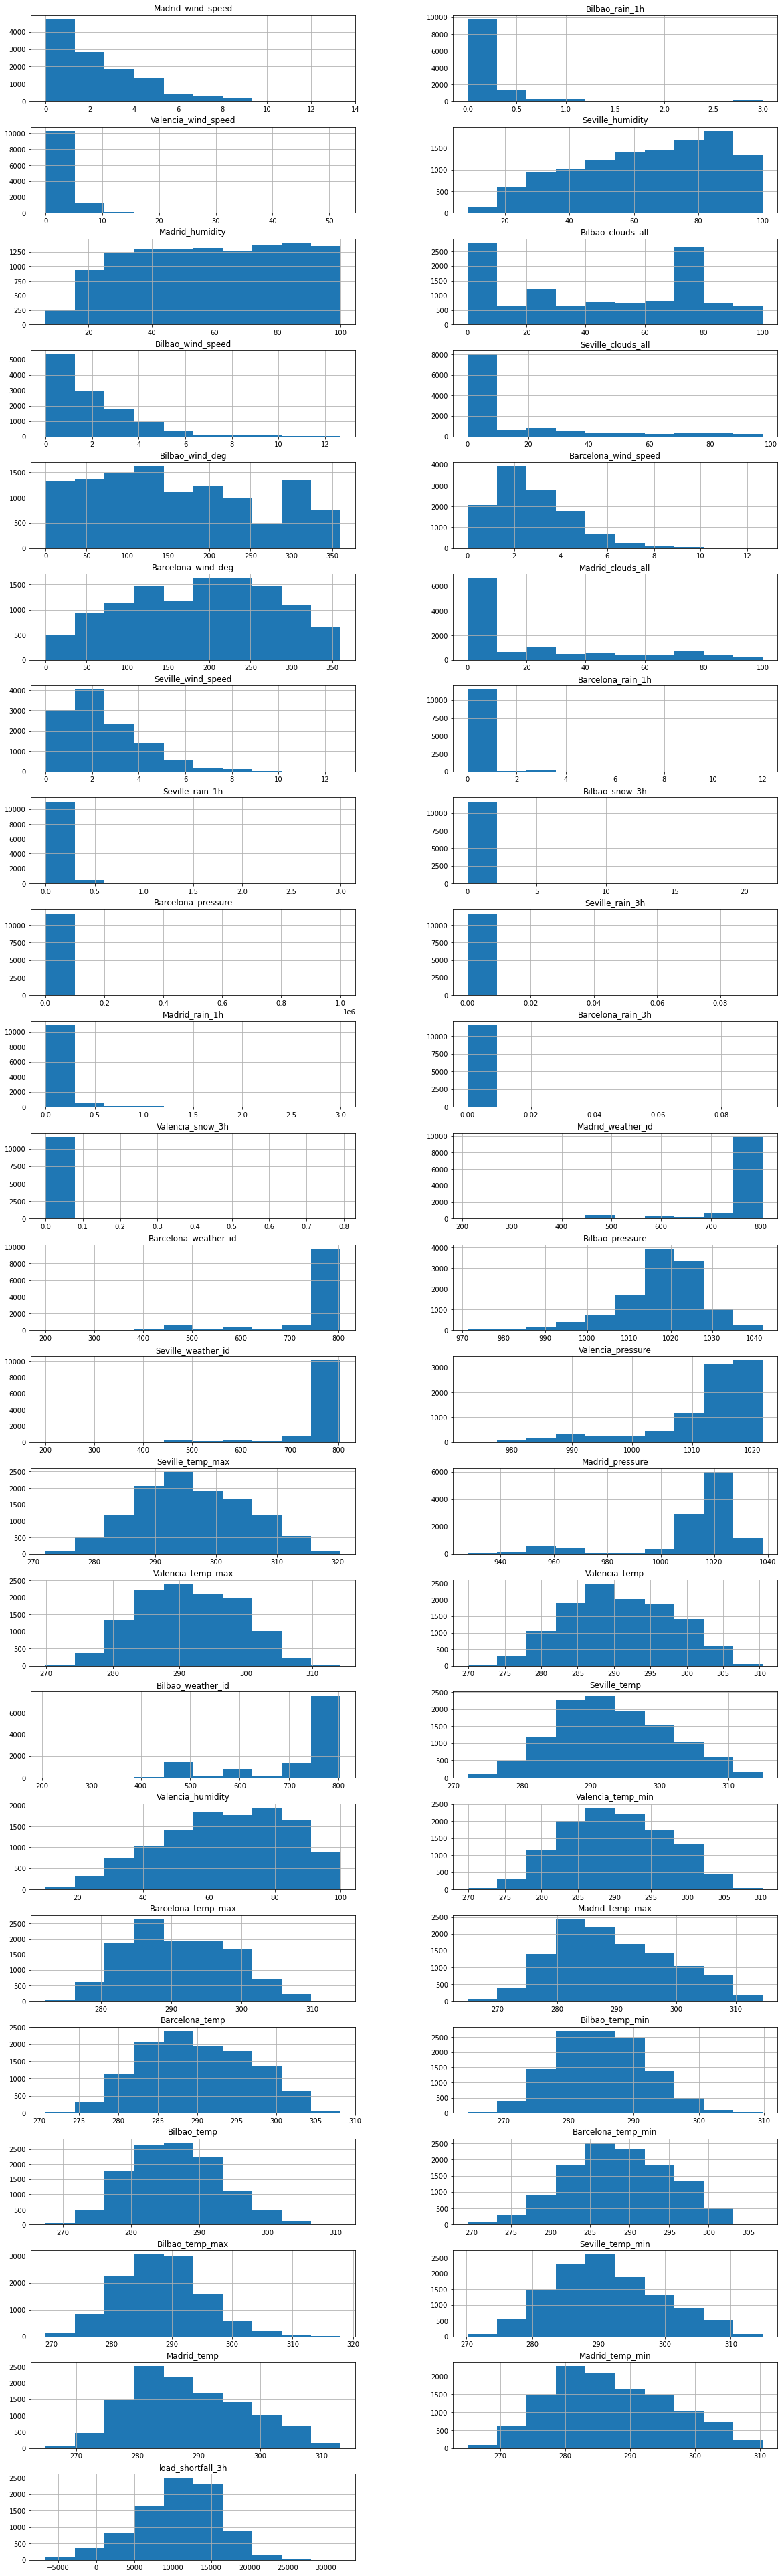

In [17]:
features = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 
            'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 
            'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 
            'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 
            'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 
            'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 
            'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 
            'Seville_weather_id','Valencia_pressure','Seville_temp_max','Madrid_pressure', 
            'Valencia_temp_max','Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 
            'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 
            'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 
            'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']

final_data[features].hist(layout=(23, 2), figsize=(20,70));

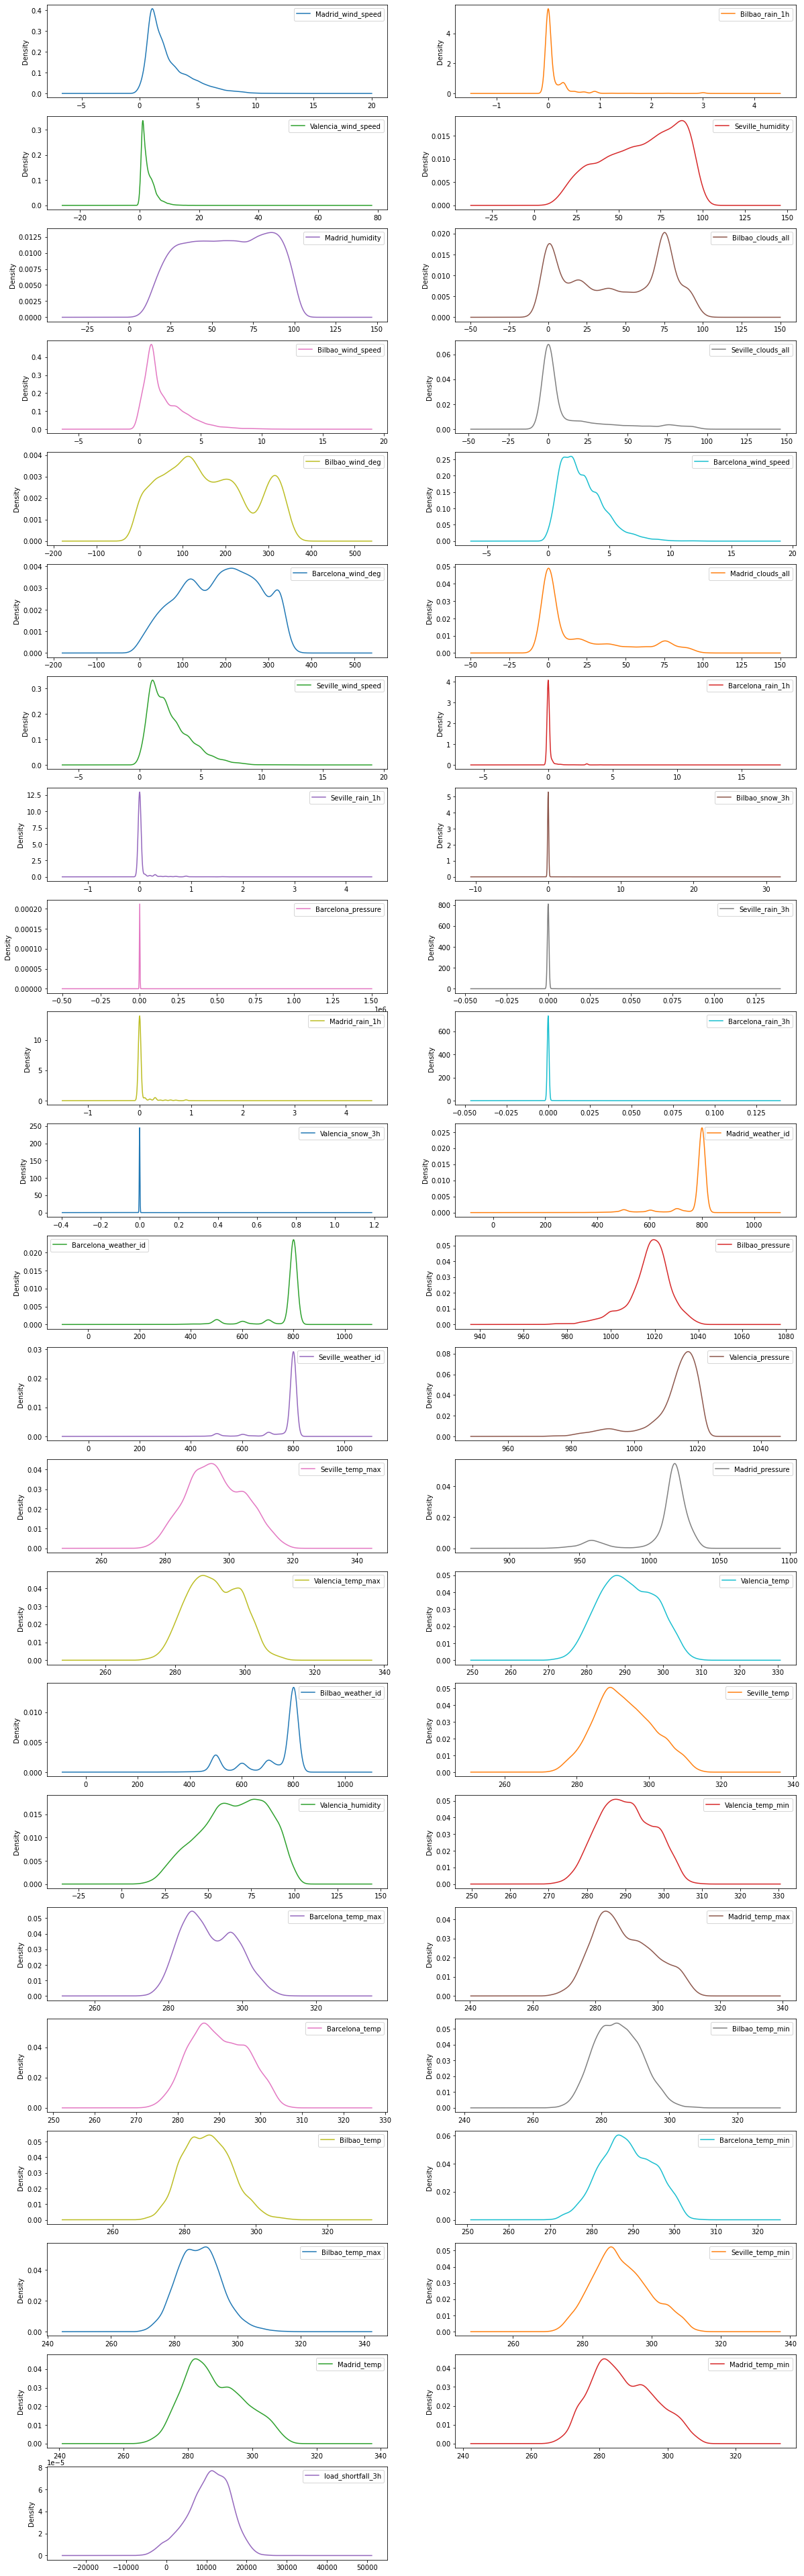

In [18]:
final_data[features].plot(kind='density', subplots=True, layout=(23, 2), sharex=False, figsize=(20,70));

### b. Box Plot and Violin Plot
For the Box Plot and Violin Plot, we will use the seaborn library and only select three random features instead of all the numerical features. We can visualise all numerical features simultaneously, 
but as the range of values for each feature is different, it will not create a useful visualisation.

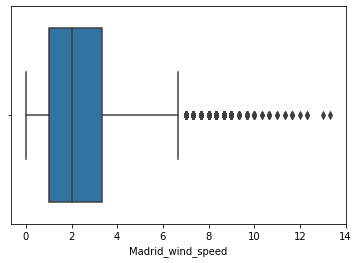

In [19]:
sns.boxplot(x='Madrid_wind_speed', data=final_data);

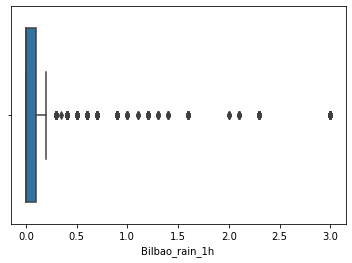

In [20]:
sns.boxplot(x='Bilbao_rain_1h', data=final_data);

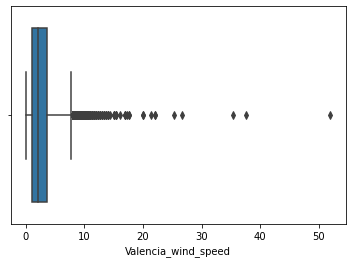

In [21]:
sns.boxplot(x='Valencia_wind_speed', data=final_data);

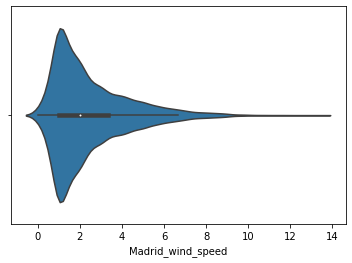

In [22]:
sns.violinplot(x='Madrid_wind_speed', data=final_data);

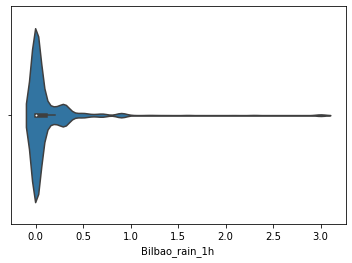

In [23]:
sns.violinplot(x='Bilbao_rain_1h', data=final_data);

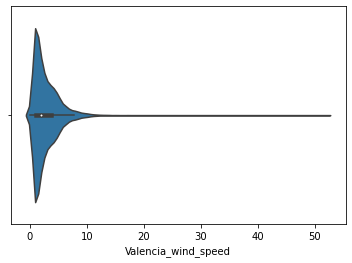

In [24]:
sns.violinplot(x='Valencia_wind_speed', data=final_data);

### c. BarPlot

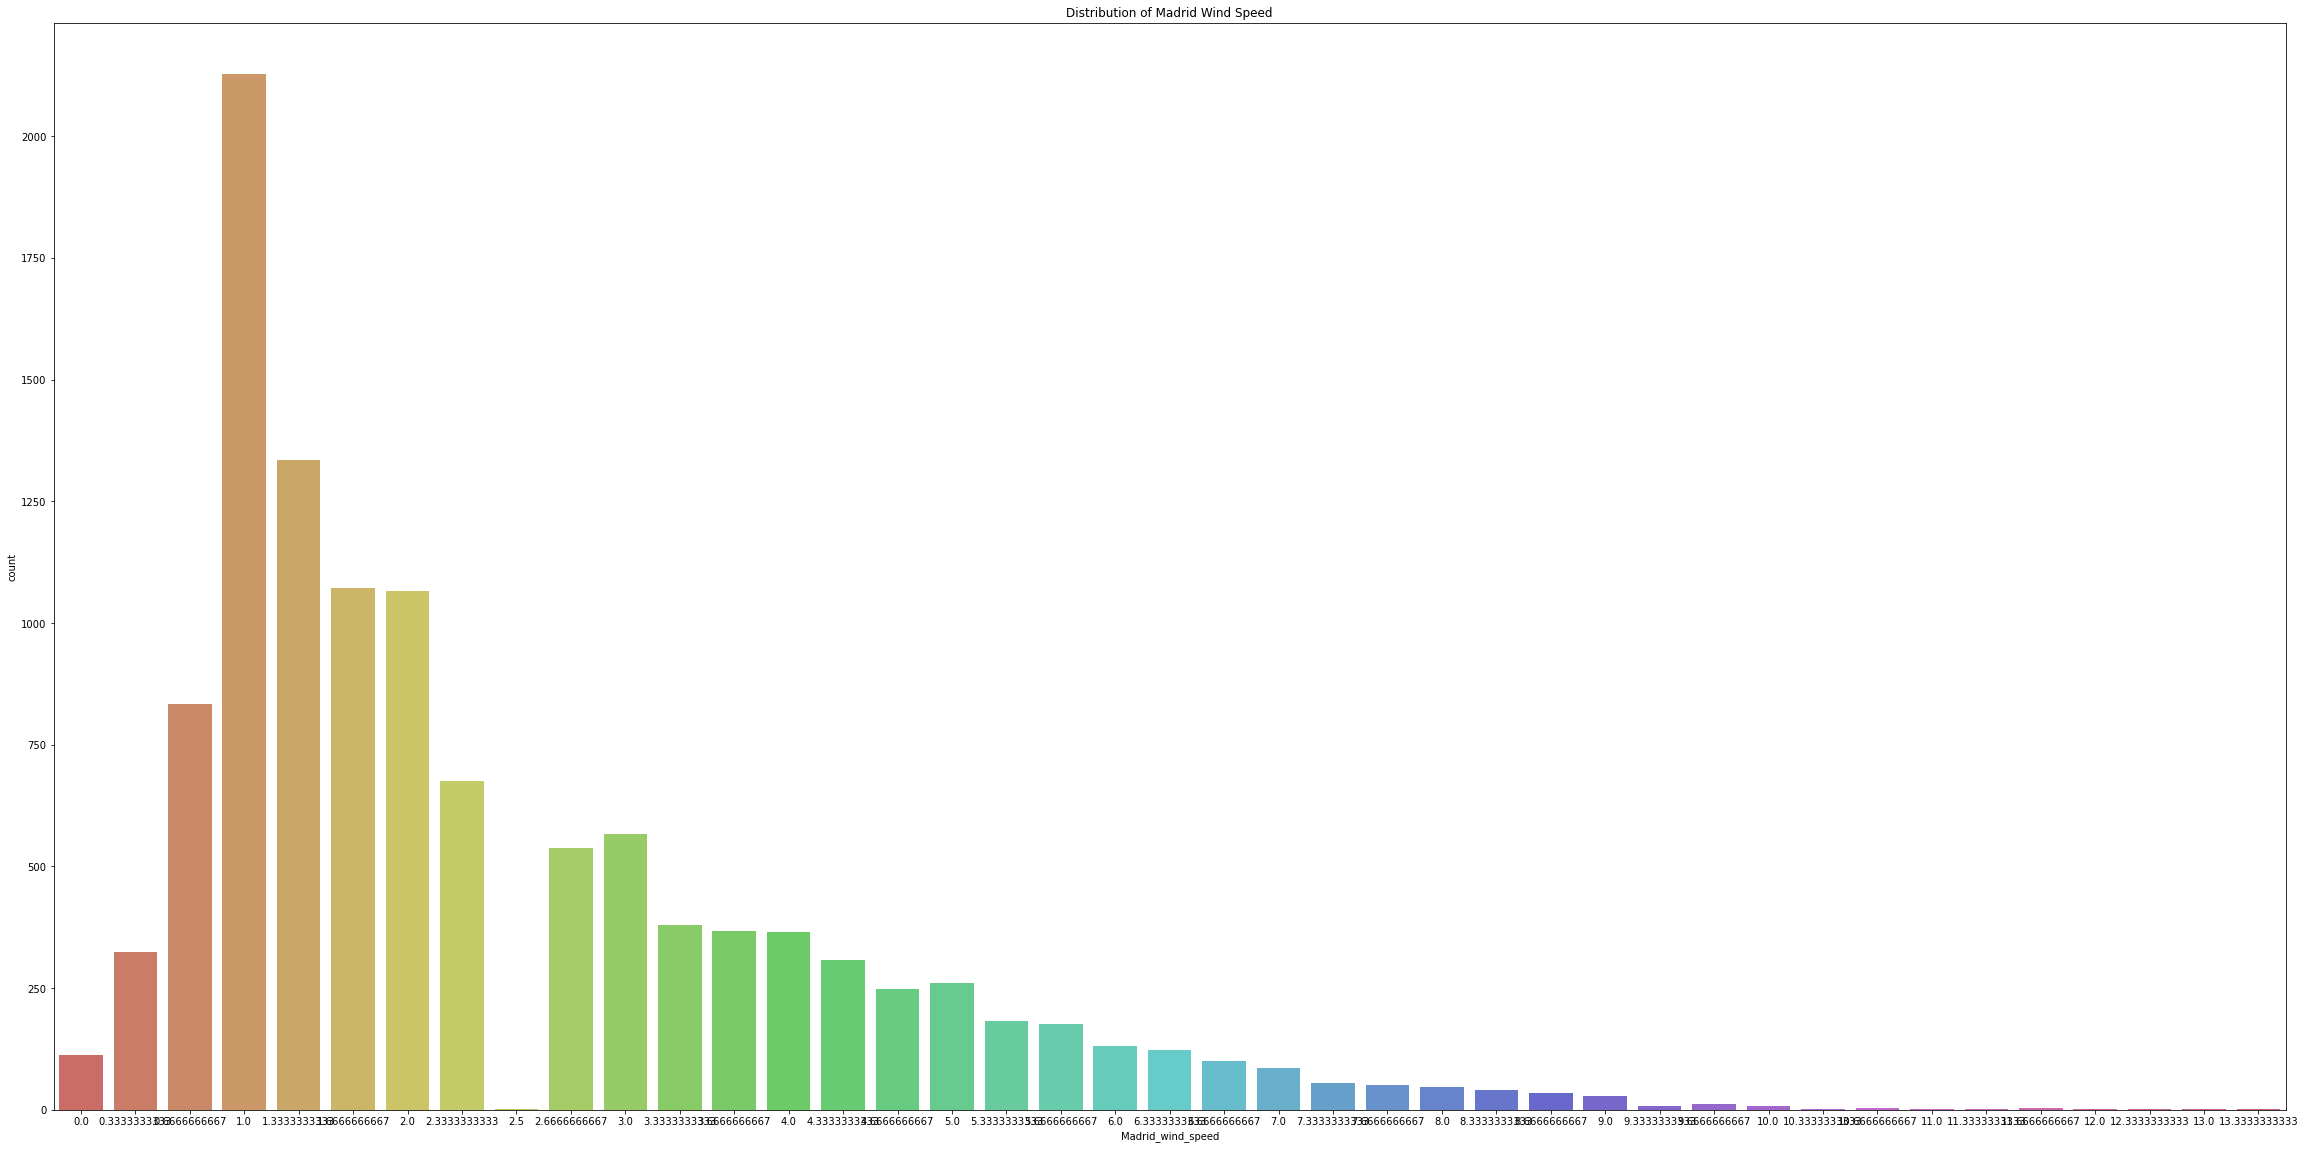

In [25]:
plt.figure(figsize=(40,20))
sns.countplot(x ='Madrid_wind_speed' , data = final_data, palette="hls")
plt.title("Distribution of Madrid Wind Speed");

 # III.  Multivariate Analysis: Non-Graphical 

In [26]:
final_data.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.247761,0.524549,-0.114347,-0.116172,0.225566,0.382617,0.185177,0.272466,0.272295,...,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Bilbao_rain_1h,0.247761,1.000000,0.240118,0.063048,0.098192,0.361385,0.075120,0.074137,0.255858,0.070787,...,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,-0.152510
Valencia_wind_speed,0.524549,0.240118,1.000000,-0.095533,-0.029066,0.192272,0.398683,0.146475,0.255511,0.350592,...,-0.020645,-0.016290,-0.002094,-0.014087,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.142791
Seville_humidity,-0.114347,0.063048,-0.095533,1.000000,0.794435,0.055132,-0.096654,0.397249,-0.118299,-0.154620,...,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,-0.167290
Madrid_humidity,-0.116172,0.098192,-0.029066,0.794435,1.000000,0.033094,-0.012729,0.363340,-0.091650,-0.065749,...,-0.798668,-0.677792,-0.626489,-0.620312,-0.636039,-0.590620,-0.764148,-0.795066,-0.757692,-0.150536
Bilbao_clouds_all,0.225566,0.361385,0.192272,0.055132,0.033094,1.000000,0.024394,0.037675,0.267920,0.081249,...,-0.060564,-0.035391,-0.082353,-0.126287,-0.025979,-0.170196,-0.089831,-0.059928,-0.060271,-0.127293
Bilbao_wind_speed,0.382617,0.075120,0.398683,-0.096654,-0.012729,0.024394,1.000000,0.132678,0.440740,0.268904,...,0.015822,0.008407,0.098830,0.131612,0.016688,0.166347,0.047191,0.019764,0.006009,-0.081602
Seville_clouds_all,0.185177,0.074137,0.146475,0.397249,0.363340,0.037675,0.132678,1.000000,0.042427,0.111393,...,-0.231967,-0.178549,-0.132287,-0.144719,-0.150584,-0.152165,-0.194561,-0.222425,-0.213539,-0.091804
Bilbao_wind_deg,0.272466,0.255858,0.255511,-0.118299,-0.091650,0.267920,0.440740,0.042427,1.000000,0.176470,...,0.051832,0.080329,0.110097,0.084298,0.094344,0.052073,0.080600,0.063938,0.062808,-0.120800
Barcelona_wind_speed,0.272295,0.070787,0.350592,-0.154620,-0.065749,0.081249,0.268904,0.111393,0.176470,1.000000,...,0.071381,0.095109,0.110704,0.106629,0.083827,0.094279,0.122419,0.072738,0.063878,-0.103633


# IV.  Multivariate Analysis: Graphical

# evaluate correlation

### a. Correlation Heatmap

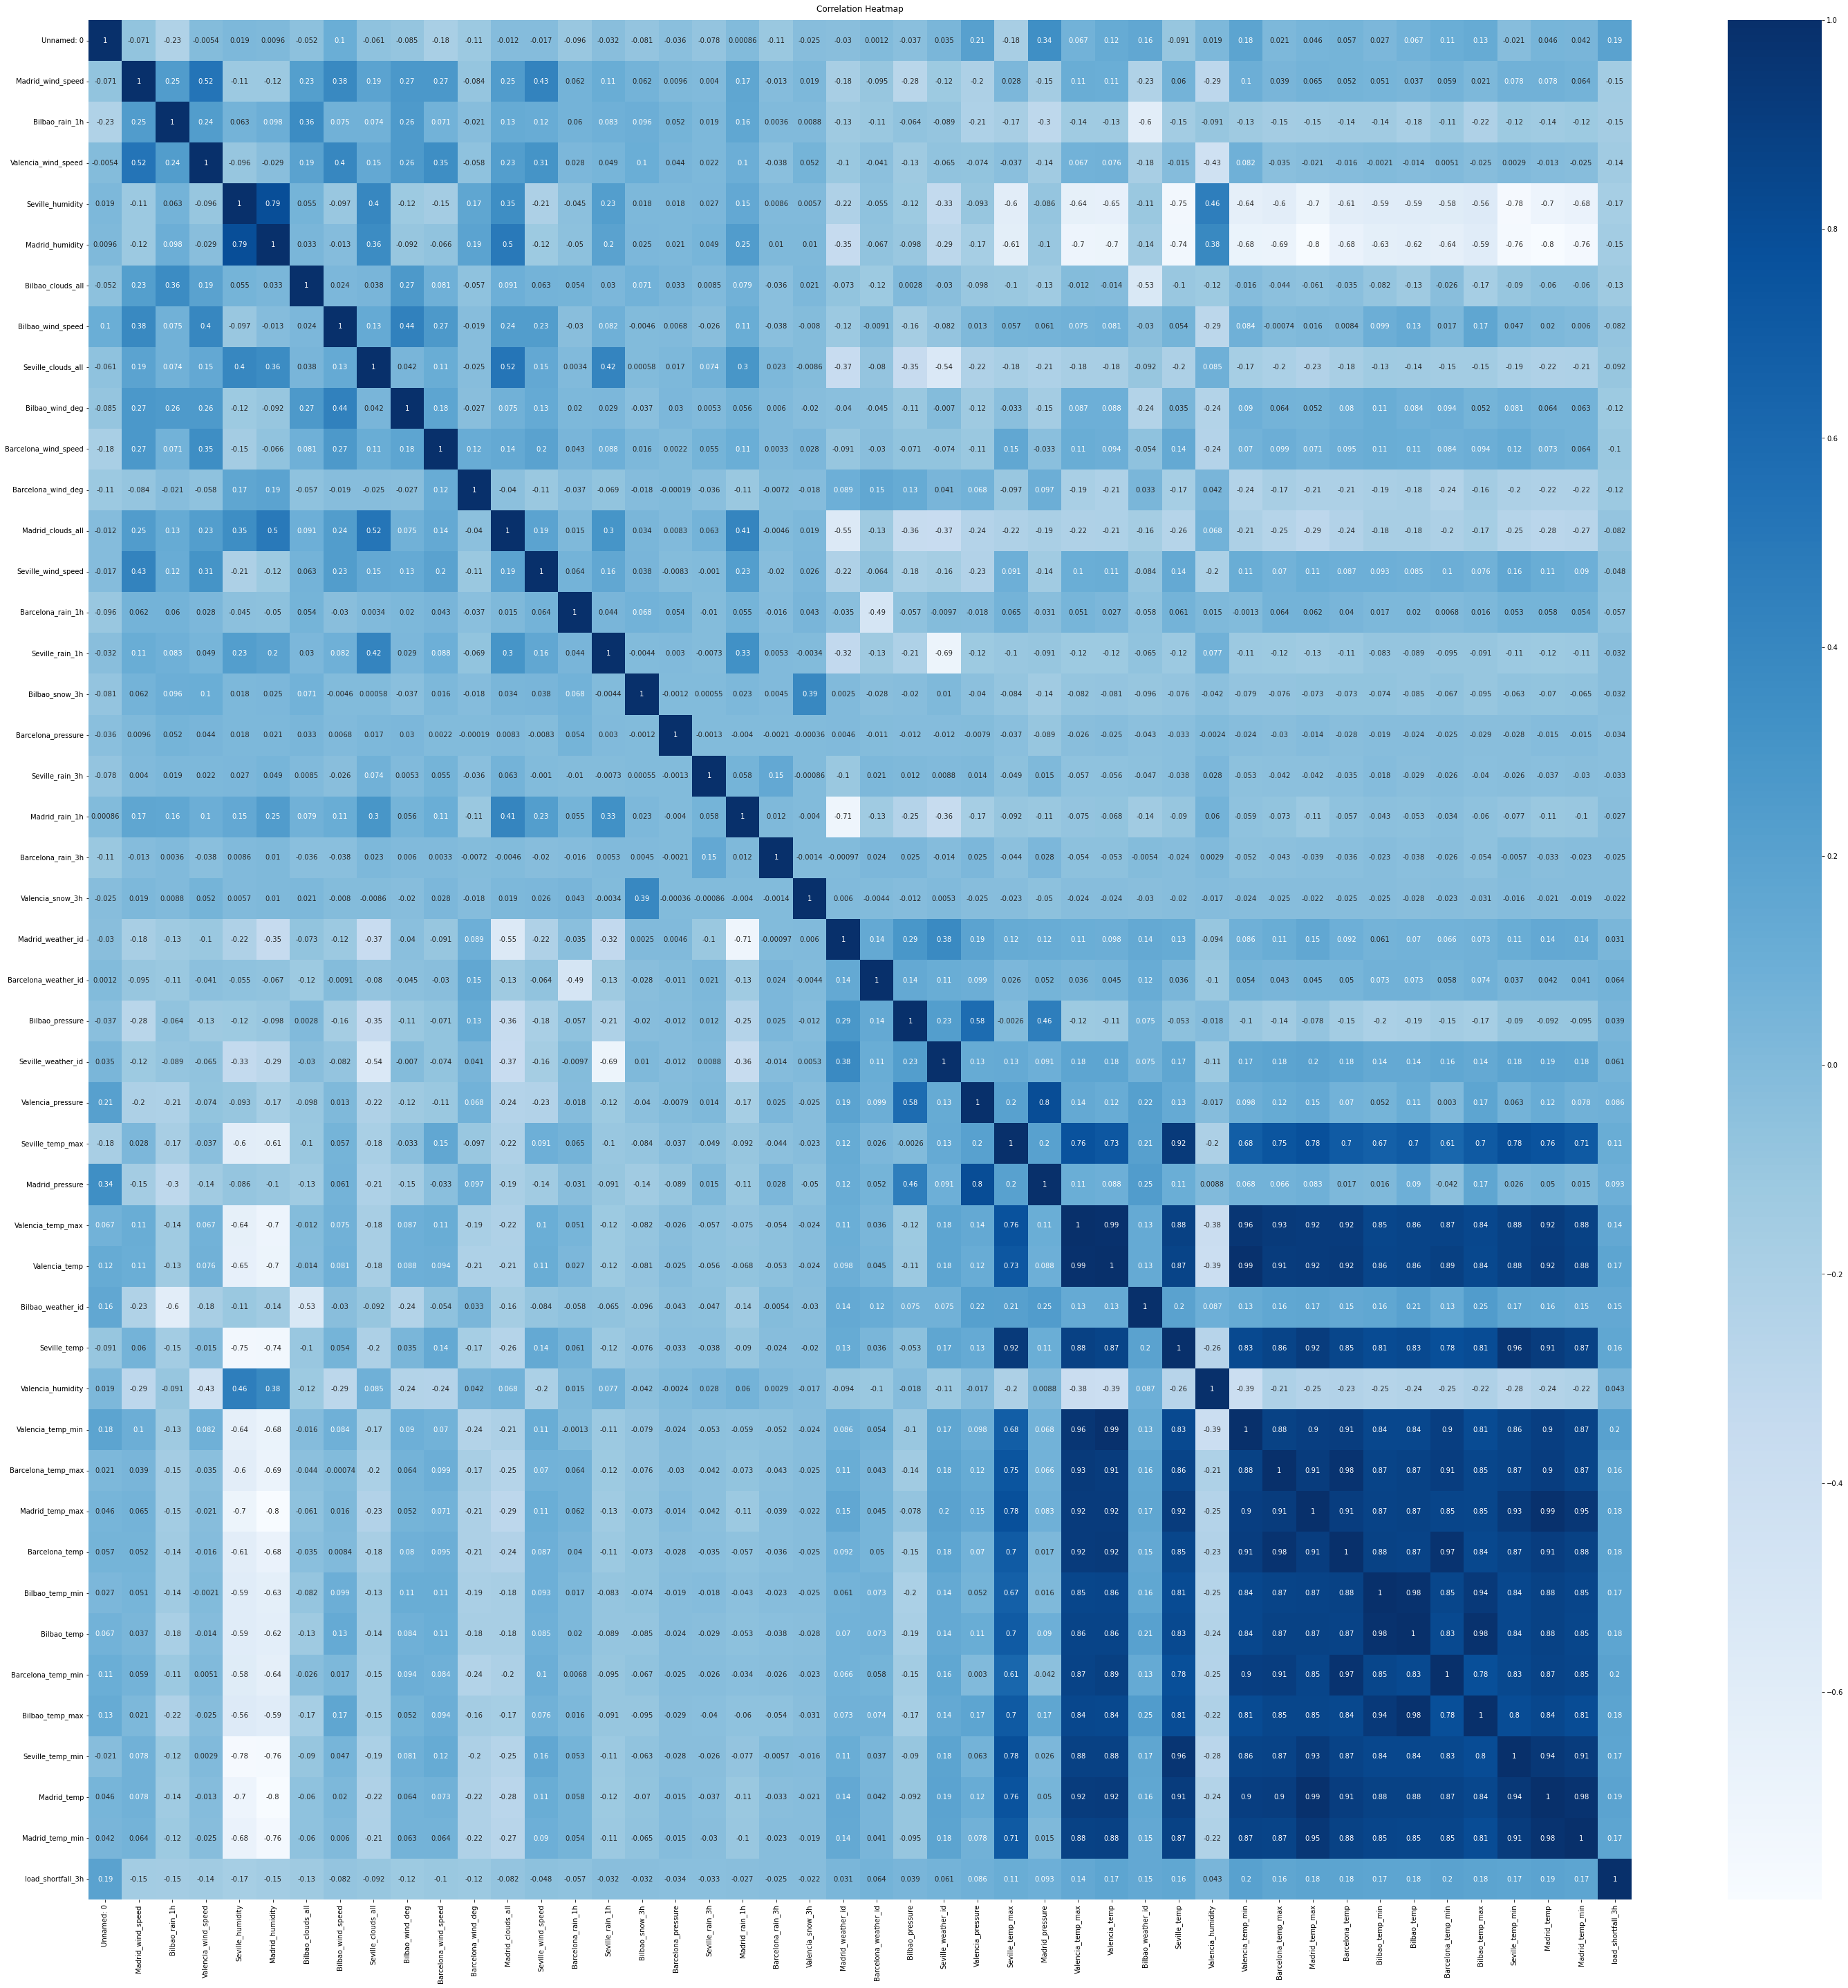

In [27]:
plt.figure(figsize=(50,50))
heatmap = sns.heatmap(merged_data.corr(),cbar=True,annot=True,cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### b. Scatter Plot

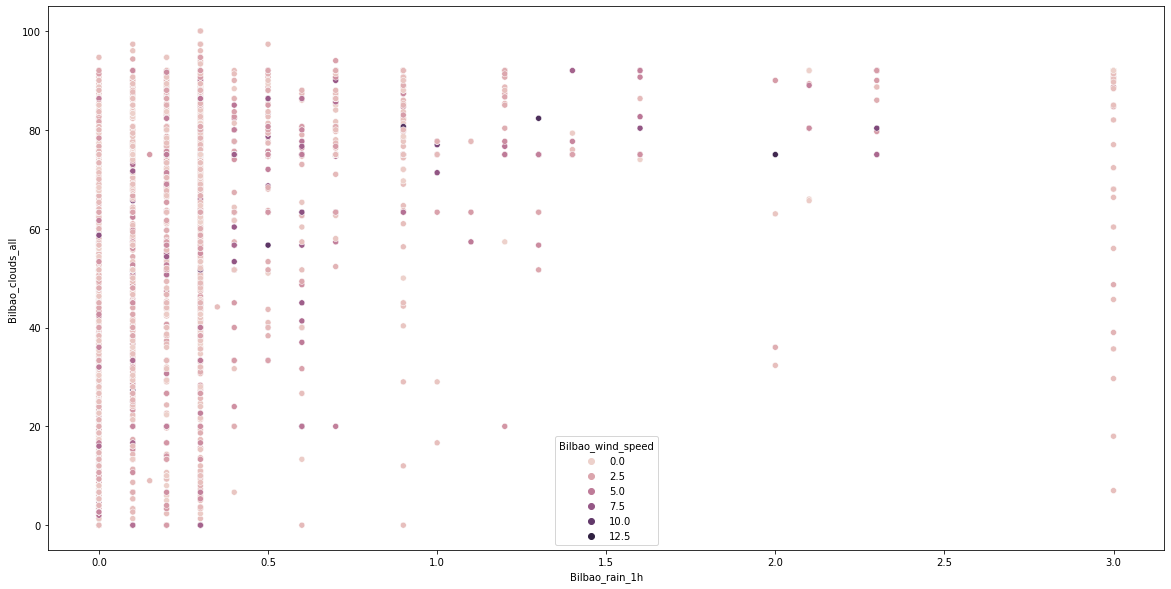

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Bilbao_rain_1h',y='Bilbao_clouds_all',hue='Bilbao_wind_speed',data=final_data);

In [29]:
# plot relevant feature interactions

In [30]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [31]:
# remove missing values/ features

#Step 1
#lets tackle nulls in the dataset
final_data['Valencia_pressure']=final_data['Valencia_pressure'].fillna(final_data['Valencia_pressure'].mode()[0])


In [32]:
final_data['Valencia_wind_deg'] 

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [33]:
# engineer existing features
final_data['Valencia_wind_deg'] = final_data['Valencia_wind_deg'].str.extract('(\d+)')
final_data['Valencia_wind_deg'] = pd.to_numeric(final_data['Valencia_wind_deg'])


In [34]:
final_data['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [35]:
final_data['Seville_pressure']=final_data['Seville_pressure'].str.extract('(\d+)')
final_data['Seville_pressure']=pd.to_numeric(final_data['Seville_pressure'])

In [36]:
final_data['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

from tqdm import tqdm
import math
import random

from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import pearsonr
import seaborn as sns

In [38]:
import time

##We now change the datetime
final_data['time']=pd.to_datetime(final_data['time'])

#We now split the time column into year, month and hour
#final_data['Year']= final_data['time'].dt.year
final_data['Month']=final_data['time'].dt.month
final_data['Hour']=final_data['time'].dt.hour

#Now, let us drop the time column
final_data=final_data.drop(['time'], axis=1)

In [39]:
#we wish to break down months into 4 seasons i.e Winter(June-Aug), and Spring(Sep-Nov), 
#Summer(Dec-mar),Autumn(Apr-May)[Source:Internet]

def Season(monthID):
    if monthID>=6 and monthID<=8:
        return 1
    elif monthID>=9 and monthID<=11:
        return 2
    elif monthID==12 or monthID<=2:
        return 3
    else:
        return 4

#We wish to break down the day into five i.e Dusk (1-5), Morning (6-12), Afternoon (13-15), Evening (16-19), Night(20-23.59)
def Time_of_day(HourID):
    if HourID<=5:
        return 1
    elif HourID>=6 and HourID<=12:
        return 2
    elif HourID>=13 and HourID<=15:
        return 3
    elif HourID>=16 and HourID<=19:
        return 4
    else:
        return 5

In [40]:
#Use the functions created in the above cell
final_data['Season']=final_data['Month'].apply(lambda x:Season(x))
final_data['Time_of_day']=final_data['Hour'].apply(lambda x:Time_of_day(x))

#Drop the month and Hour data
final_data=final_data.drop(['Month','Hour'], axis=1)

In [41]:
'''It seems as if the features are many. We wish to remove the redundant features. 
In this case, we will check those with decent correlation with the 'load_shortfall_3h'
as well as those with significance (using p-value)
'''
final_corr=final_data[:len(train)]
# Calculate correlations between predictor variables and the response variable
corrs = final_corr.corr()['load_shortfall_3h'].sort_values(ascending=False)


# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(final_corr[col], final_corr['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
Seville_weather_id,0.061104,0.000000
Valencia_wind_deg,-0.188674,0.000000
Barcelona_rain_1h,-0.056633,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Madrid_clouds_all,-0.081623,0.000000
Seville_clouds_all,-0.091804,0.000000
Barcelona_wind_speed,-0.103633,0.000000
Barcelona_wind_deg,-0.116133,0.000000
Bilbao_wind_deg,-0.120800,0.000000


It seems all the features are significant. They all have p-values below 0.05 i.e 5% significance. Now let us check for 
collinearity.

In [42]:
# We are looking for rows and columns where correlation coefficients > 0.9 or <-0.9
corr = final_corr.drop('load_shortfall_3h', axis = 1).corr()
# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Season,Time_of_day
Madrid_wind_speed,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_wind_deg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_rain_1h,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valencia_wind_speed,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_humidity,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_humidity,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_clouds_all,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_wind_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_clouds_all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_wind_deg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the cross-correlation, it is observed that temp,temp_min and temp_max for the all the cities are highly correlated.
This could lead to multi-collinearity.

The significance check earlier done shows that apart from madrid, temp_min is the most significant feature.
For this reason, we drop temp and temp_max for all the cities

In [43]:
final_data=final_data.drop(['Barcelona_temp', 'Barcelona_temp_max','Madrid_temp', 'Madrid_temp_max','Seville_temp', 'Seville_temp_max','Bilbao_temp', 'Bilbao_temp_max','Valencia_temp', 'Valencia_temp_max'], axis=1)

In [44]:
y = final_data[:len(train)][['load_shortfall_3h']]
x = final_data[:len(train)].drop('load_shortfall_3h', axis = 1)

#x_train = final_data[:len(final_data)].drop('load_shortfall_3h', axis = 1)
#x_test = final_data[len(final_data):].drop('load_shortfall_3h', axis = 1)


In [45]:
x.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_pressure,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Bilbao_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min,Season,Time_of_day
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,971.333333,800.0,75.666667,269.888000,269.338615,281.013000,274.254667,265.938000,3,1
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,972.666667,800.0,71.000000,271.728333,270.376000,280.561667,274.945000,266.386667,3,2
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,974.000000,800.0,65.666667,278.008667,275.027229,281.583667,278.792000,272.708667,3,2
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,994.666667,800.0,54.000000,284.899552,281.135063,283.434104,285.394000,281.895219,3,2
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,1035.333333,800.0,58.333333,283.015115,282.252063,284.213167,285.513719,280.678437,3,3


In [46]:
y.head()

,load_shortfall_3h
0,6715.666667
1,4171.666667
2,4274.666667
3,5075.666667
4,6620.666667


In [47]:
#Select model
lr = LinearRegression()

# split data

In [48]:
#Split dataset into train and test
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2)

# create one or more ML models

### Fit lr model to x_train and y_train...Then predict

In [49]:
lr.fit(x_train, y_train)

prediction = lr.predict(x_test)

# evaluate one or more ML models

### Evaluate Model (RMSE)

In [50]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [51]:
rmse(y_test, prediction)

4734.420102030235

## Calculate r_score

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.13322462987715888

In [53]:
x_train

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_pressure,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Bilbao_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min,Season,Time_of_day
6856,2.000000,3,0.0,4.000000,26.000000,24.666667,20.000000,3.000000,0.000000,153.333333,...,1019.666667,801.000000,28.333333,298.150000,294.150000,291.816667,301.483333,295.483333,4,3
3771,4.666667,8,0.0,1.666667,95.333333,77.666667,75.000000,0.666667,51.666667,119.333333,...,1012.666667,803.000000,47.333333,290.183333,281.483333,290.483333,288.150000,283.550000,4,1
2799,0.666667,7,0.0,1.000000,51.333333,66.333333,0.000000,3.333333,0.000000,105.000000,...,1030.000000,800.000000,46.333333,291.650000,285.630000,288.650000,289.961667,283.820000,3,2
1756,3.666667,1,0.0,0.666667,51.000000,70.666667,33.333333,0.000000,6.666667,107.000000,...,1021.000000,801.666667,83.000000,291.666667,284.816667,290.186667,301.150000,273.150000,1,1
3124,0.000000,6,0.0,1.000000,98.666667,100.000000,24.000000,2.333333,68.000000,188.666667,...,1029.666667,801.333333,86.666667,281.394667,280.158000,282.853000,281.890000,280.575000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,2.000000,1,0.0,0.666667,87.333333,72.666667,75.000000,1.000000,13.333333,40.000000,...,1019.333333,803.000000,70.666667,284.633333,286.150000,285.370000,288.150000,283.710000,2,2
4290,2.333333,3,0.0,1.000000,26.666667,30.333333,0.000000,0.333333,0.000000,188.000000,...,1020.333333,800.000000,58.333333,292.340000,290.743333,289.450000,302.958667,300.583333,1,5
5110,1.000000,2,1.4,1.333333,53.000000,30.666667,76.000000,1.000000,0.000000,326.000000,...,1014.333333,501.000000,71.333333,289.450000,287.590000,288.333333,296.450000,288.706667,2,2
3943,5.000000,4,0.0,3.333333,90.000000,85.333333,75.000000,11.666667,63.333333,146.666667,...,1001.000000,803.000000,88.000000,287.036667,288.630000,285.556667,287.816667,283.583333,4,2


In [54]:
# create targets and features dataset

In [55]:
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [56]:
# create scaler object
scaler = StandardScaler()

In [57]:
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(x)

In [58]:
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=x.columns)
X_standardise.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_pressure,Bilbao_weather_id,Valencia_humidity,Valencia_temp_min,Bilbao_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min,Season,Time_of_day
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-1.756232,0.649842,0.540928,-2.892663,-2.338357,-1.218309,-2.125118,-2.309892,0.44688,-1.133622
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-1.696165,0.649842,0.298645,-2.626219,-2.183645,-1.292271,-2.040702,-2.261154,0.44688,-0.377730
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-1.636097,0.649842,0.021750,-1.716949,-1.489980,-1.124792,-1.570279,-1.574407,0.44688,-0.377730
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-0.705052,0.649842,-0.583957,-0.719283,-0.579082,-0.821553,-0.762967,-0.576488,0.44688,-0.377730
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,1.127003,0.649842,-0.358980,-0.992113,-0.412497,-0.693885,-0.748327,-0.708665,0.44688,0.378162


In [59]:
#Split dataset into train and test
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(X_standardise, y, test_size = 0.2)

In [60]:
lr.fit(x_train, y_train)

prediction = lr.predict(x_test)

In [61]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [62]:
rmse(y_test, prediction)

4702.8839689980705

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.16749340396773194

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [64]:
# Compare model performance

In [65]:
# Choose best model and motivate why it is the best choice
#Split dataset into train and test
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [66]:
# discuss chosen methods logic

## This is for the submission process

In [67]:
x_train = final_data[:len(train)].drop('load_shortfall_3h', axis = 1)
x_test = final_data[len(train):].drop('load_shortfall_3h', axis = 1)

In [68]:
lr.fit(x_train, y)
prediction = lr.predict(x_test)

In [69]:
daf = pd.DataFrame(prediction, columns = ['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,8740.990598
1,8079.665469
2,8982.195009
3,9746.458596
4,8756.649520


In [70]:
output = pd.DataFrame({'time':test['time']})
submission = output.join(daf)
submission.to_csv('submission.csv', index = False)